# Google Play Store Apps Data Analysis 

This dataset is about Google Play Store Apps and has been downloaded from Kaggle. The aim of this data analysis project is to extract meaningful insights from the dataset using various libraries of python such as numpy , pandas and create beautiful visulisations using matplotlib library. 

## Downloading the Dataset

The dataset is downloaded with the help of opendatasets library from Kaggle and extracted.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/lava18/google-play-store-apps' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dewanshdikshit
Your Kaggle Key: ········


100%|██████████| 1.94M/1.94M [00:00<00:00, 65.3MB/s]

The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './google-play-store-apps'

In [5]:
import os
os.listdir(data_dir)

['googleplaystore_user_reviews.csv', 'license.txt', 'googleplaystore.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "Google Play Store Apps Data Analysis " # change this (use lowercase letters and hyphens only)

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "dewansh99clicks/google-play-store-apps-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/dewansh99clicks/google-play-store-apps-data-analysis


'https://jovian.ai/dewansh99clicks/google-play-store-apps-data-analysis'

## Data Preparation and Cleaning

Now the dataset is loaded using pandas library and exploratory data analysis is performed on the dataset using various functions of pandas library in EDA we check for missing values in the dataset and get more and more information from the dataset and understand correlations between various features of the dataset. 

In [10]:
#loading the dataset
import pandas as pd
import numpy as np
data = pd.read_csv(data_dir + "/googleplaystore.csv")
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [11]:
#viewing first 5 rows of dataset
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [12]:
# getting info about the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [13]:
data.loc[10472,"Reviews"] = 3.0
data["Reviews"] = pd.to_numeric(data["Reviews"])

In [14]:
#statistical info about the numerical cols.
data.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Rating,Reviews
count,9367.00000,10841.00000
mean,4.19334,444111.92658
std,0.53743,2927628.66420
min,1.00000,0.00000
25%,4.00000,38.00000
50%,4.30000,2094.00000
75%,4.50000,54768.00000
max,19.00000,78158306.00000


In [15]:
#Total missing values in each coloumn
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<AxesSubplot:>

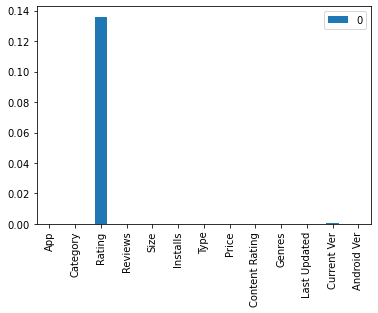

In [16]:
#visulisation of missing values
missing = data.isna().sum()/len(data)
missing_df = pd.DataFrame(missing)
missing_df.plot(kind="bar")

In [17]:
data["Rating"] = data["Rating"].interpolate()
data["Type"] = data["Type"].fillna("bfill")
data["Content Rating"] = data["Content Rating"].fillna("bfill")
data["Current Ver"] = data["Current Ver"].fillna(data["Current Ver"].mode)
data["Android Ver"] = data["Android Ver"].fillna(data["Android Ver"].mode)

In [18]:
Q3 = data.Reviews.quantile(0.75)
Q1 = data.Reviews.quantile(0.25)
IQR = Q3-Q1
upper = Q3+1.5*IQR
lower = Q1-1.5*IQR
outlier_1 = data[(data["Reviews"]>upper)|(data["Reviews"]<lower)]
data.drop(outlier_1.index,inplace = True)

In [19]:
q3 = data.Rating.quantile(0.75)
q1 = data.Rating.quantile(0.25)
iqr = q3-q1
upper_1 = q3+1.5*iqr
lower_1 = q1-1.5*iqr
outlier_2 = data[(data["Rating"]>upper_1)|(data["Rating"]<lower_1)]
data.drop(outlier_2.index,inplace = True)
data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reviews', ylabel='Density'>

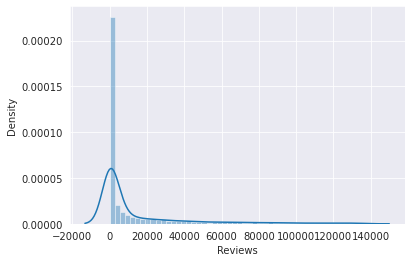

In [20]:
import seaborn as sns
sns.set_style("darkgrid")
sns.distplot(data.Reviews)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

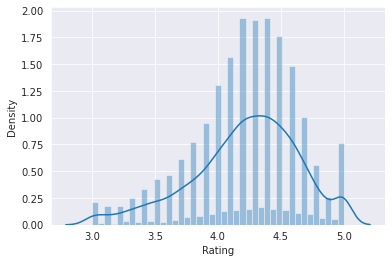

In [21]:
sns.distplot(data.Rating)

In [22]:
import jovian

In [23]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "dewansh99clicks/google-play-store-apps-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/dewansh99clicks/google-play-store-apps-data-analysis


'https://jovian.ai/dewansh99clicks/google-play-store-apps-data-analysis'

### In this section we are going to explore various columns of the dataset using various plots of seaborn and matplotlib and gaun some insights. 

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [24]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### In this scatter plot we are trying to observe how the rating and review varies and it is observed that differnt content rating have different reviews for same rating .

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='Reviews'>

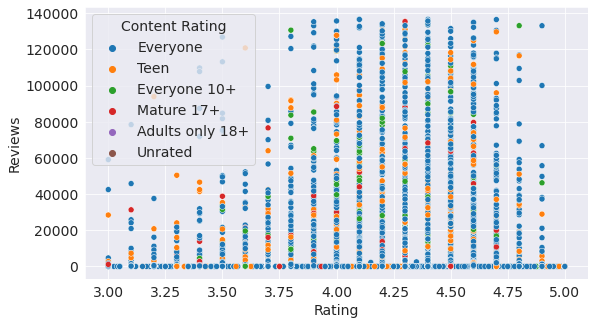

In [25]:
sns.scatterplot(data["Rating"],data["Reviews"],hue=data["Content Rating"])

### In this barplot we see that different content rating have different reviews and Everyone content rating has highest reviews.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Content Rating', ylabel='Reviews'>

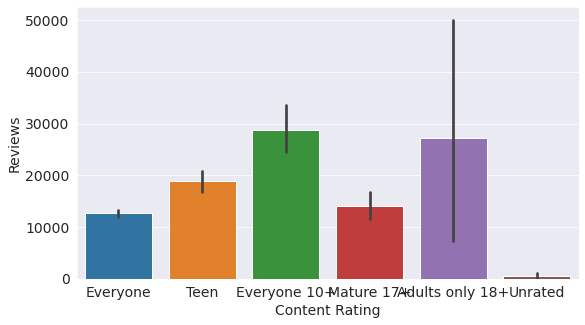

In [26]:
sns.barplot(data["Content Rating"],data["Reviews"])

### In this bar plot we see that different content rating have different rating and Adult 18+ content rating has highest highest rating.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

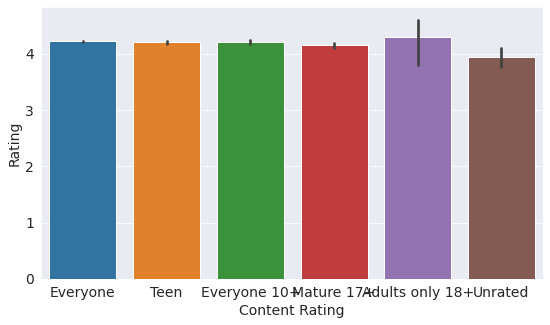

In [27]:
sns.barplot(data["Content Rating"],data["Rating"])

### In this we are seeing the distribution plot of means of Reviews grouped for Price and it is seen that fir for the distribution is Logistic Distribution.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reviews', ylabel='Density'>

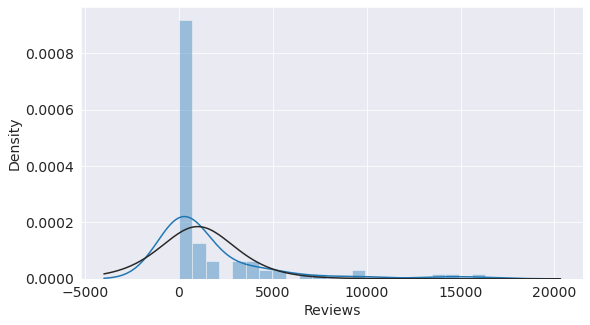

In [47]:
from scipy import stats
group_df = data.groupby("Price").mean()
sns.distplot(group_df["Reviews"],fit = stats.logistic)

### In this we are seeing the distribution plot of means of Rating grouped for Price and it is seen that fir for the distribution is Genralised Gamma Distribution.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

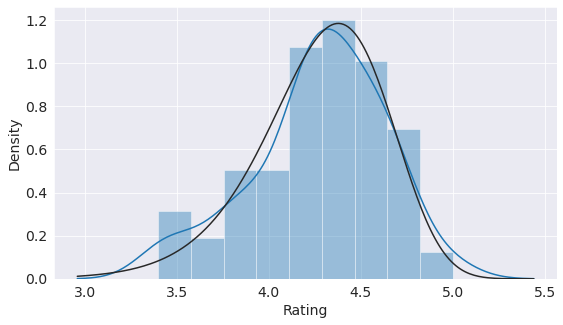

In [29]:
sns.distplot(group_df["Rating"],fit=stats.gengamma)

### In this plot box plot we are seeing summary statistics for the reviews column for different content category.

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

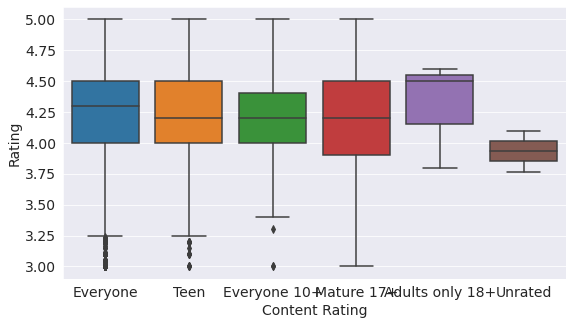

In [30]:
sns.boxplot(x="Content Rating",y = "Rating",data=data)

### In this violin plot we are trying to visualise the summary statistics and density for the Rating column for different categories.

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

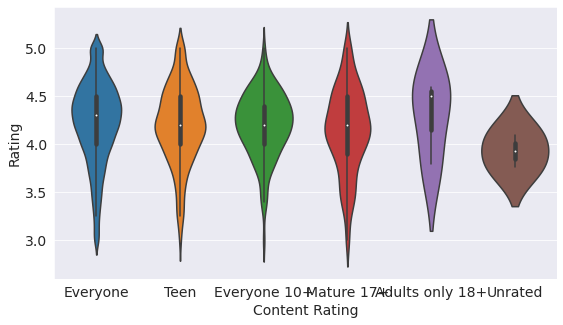

In [31]:
sns.violinplot(x="Content Rating",y= "Rating",data=data)

### In this kernel density estimate plot we are trying to observe the kernel density estimate of both Reviews and Rating together.

<AxesSubplot:xlabel='Rating', ylabel='Reviews'>

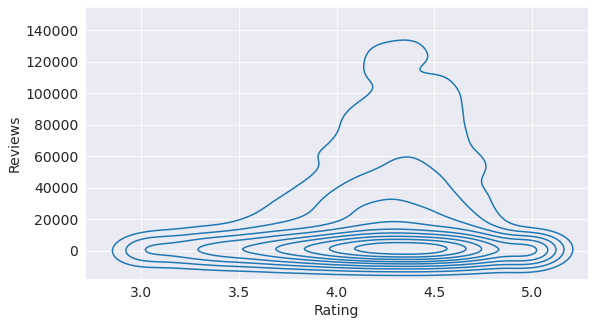

In [32]:
sns.kdeplot(x="Rating",y="Reviews",data=data)

Let us save and upload our work to Jovian before continuing

In [58]:
import jovian

In [59]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "dewansh99clicks/google-play-store-apps-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/dewansh99clicks/google-play-store-apps-data-analysis


'https://jovian.ai/dewansh99clicks/google-play-store-apps-data-analysis'

## Asking and Answering Questions

##### In this we are going to ask some questions related to our dataset ad provide explaination for it.



### What is the Distribution of Review Column 

As it can be seen from distribution for the review column is chisquare distribution.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reviews', ylabel='Density'>

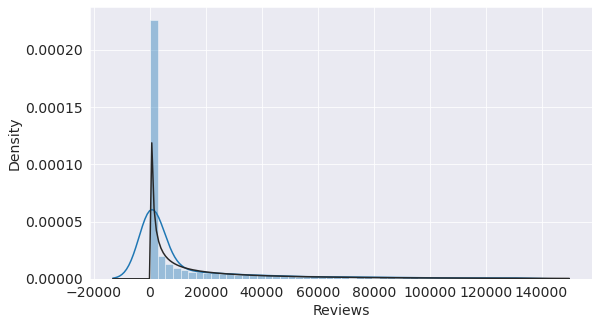

In [93]:
from scipy import stats
sns.distplot(data["Reviews"],fit = stats.chi2)

#### What is the Distribution of Ratings Column 
Distribution of ratings columns is logistic distribution

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

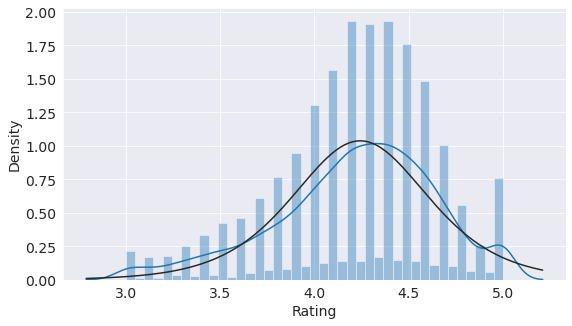

In [98]:
sns.distplot(data["Rating"],fit = stats.logistic)

#### Which Category has maximum number of ratings and Reviews

So as it can be seen that highest number of reviews are fro communication category

In [125]:
Reviews_df = pd.DataFrame(data.groupby("Category").Reviews.max())
Reviews_df[Reviews_df["Reviews"]==136662.0]

,Reviews
Category,
COMMUNICATION,136662.0


#### Which App has maximum number of Reviews

So WhatsApp Business app has maximum number of reviews

In [129]:
App_df = pd.DataFrame(data.groupby("App").Reviews.max())
App_df[App_df["Reviews"]==136662.0]

,Reviews
App,
WhatsApp Business,136662.0


#### How many numerical columns are there in the dataset 
There are two numeric cloumns in the dataset

In [139]:
import numpy as np
data.select_dtypes(include = np.number)

,Rating,Reviews
0,4.10,159.0
1,3.90,967.0
2,4.70,87510.0
4,4.30,967.0
5,4.40,167.0
...,...,...
10835,4.25,0.0
10836,4.50,38.0
10837,5.00,4.0
10838,4.75,3.0


Let us save and upload our work to Jovian before continuing.

In [140]:
import jovian

In [141]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "dewansh99clicks/google-play-store-apps-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/dewansh99clicks/google-play-store-apps-data-analysis


'https://jovian.ai/dewansh99clicks/google-play-store-apps-data-analysis'

## Inferences and Conclusion

The infrences which I concluded from the analysis about the dataset is that Whatsapp buisness app has highest number of ratings and communication category has highest number of Reviews.

In [142]:
import jovian

In [143]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "dewansh99clicks/google-play-store-apps-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/dewansh99clicks/google-play-store-apps-data-analysis


'https://jovian.ai/dewansh99clicks/google-play-store-apps-data-analysis'

## References and Future Work

The refrences which i found useful are as follows :
1. https://docs.scipy.org/doc/scipy/reference/stats.html
2. https://www.geeksforgeeks.org/

Future work can be ti find the application which has highest price

In [146]:
import jovian

In [147]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "dewansh99clicks/google-play-store-apps-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/dewansh99clicks/google-play-store-apps-data-analysis


'https://jovian.ai/dewansh99clicks/google-play-store-apps-data-analysis'